## Entropy Test for Periodicity

In random number generation, **periodicity** refers to the point where the sequence of random numbers begins to repeat itself. An **entropy test** evaluates the **uncertainty** or **disorder** in a dataset. The higher the entropy, the less periodic the dataset is. Periodicity is often undesirable in random numbers, as it introduces predictability.

By calculating the **Shannon entropy** of the data, we can measure the randomness or periodicity of a random number sequence. Low entropy suggests the sequence may exhibit periodic behavior, while high entropy indicates good randomness.

In [2]:
library(dplyr)
library(tidyverse)

### Loading the Data

We load the dataset containing the random numbers that we want to test.

In [ ]:
randoms <- read.csv("../../Data/randoms2.csv")$n

### Entropy Calculation

Shannon entropy is defined as:

$$
H(X) = \sum_{i=1}^{n} p(x_i) \log_2(p(x_i))
$$

Where:
- $p(x_i)$ is the probability of each unique value in the dataset.
- $H(X)$ represents the entropy of the dataset.

In [4]:
calculate_entropy <- function(data) {
  num_bins <- 10
  bins <- cut(data, breaks = num_bins, include.lowest = TRUE)

  freq_table <- table(bins)

  probabilities <- freq_table / sum(freq_table)

  entropy_value <- -sum(probabilities * log2(probabilities))
  return(entropy_value)
}

entropy_value <- calculate_entropy(randoms)
cat("Entropy of the dataset:", entropy_value, "\n")

Entropy of the dataset: 3.234766 


### Visualizing the Data Distribution

We can also visualize the data distribution to see how well the entropy corresponds to the pattern of the dataset.

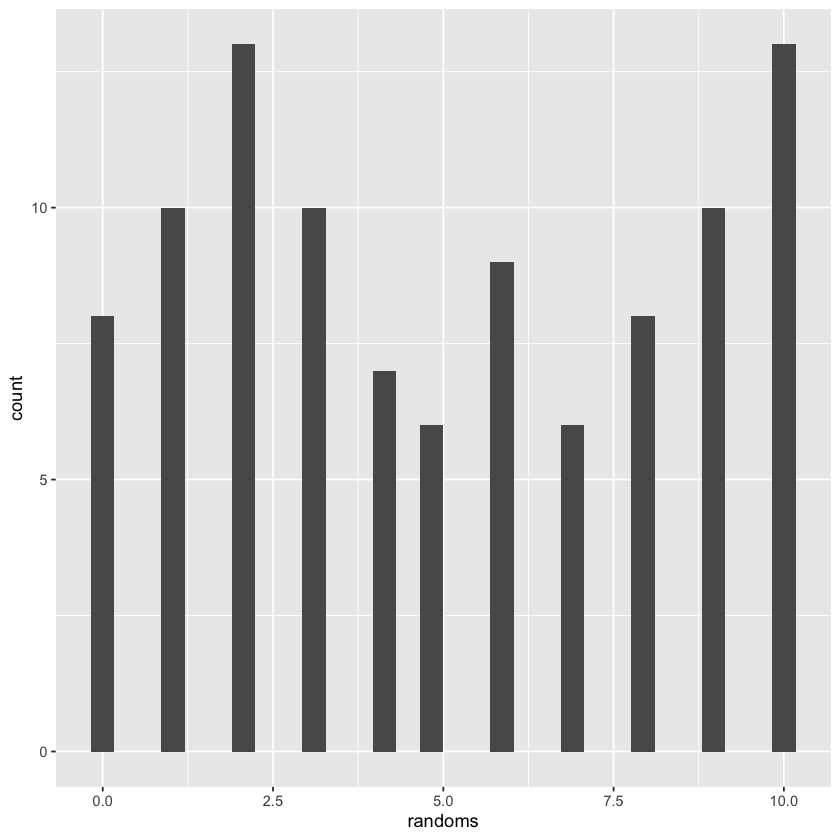

In [9]:
ggplot(
       data.frame(randoms),
       aes(x = randoms)) +
  geom_histogram(bins = 30)

## Interpretation of the Entropy Test Results

- **$H(x) < 1$**: The data may show signs of periodicity or lack sufficient randomness.
- **$H(x) \ge 1$**: The data appears to be random with high entropy.